In [313]:
!pip install newspaper3k transformers sentence-transformers -q

In [314]:
!pip install feedparser

In [315]:
!pip install lxml_html_clean

In [316]:
from transformers import pipeline
from sentence_transformers import SentenceTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import feedparser

In [317]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [318]:
from newspaper import Article

In [319]:
rss_feeds = [
    "https://rssexport.rbc.ru/rbcnews/news/20/full.rss",
    "https://meduza.io/rss/all",
    "https://tass.ru/rss/v2.xml"
]
""",
    "http://feeds.bbci.co.uk/russian/rss.xml",
    "https://www.interfax.ru/rss.asp",
    "https://russian.rt.com/rss"""

',\n    "http://feeds.bbci.co.uk/russian/rss.xml",\n    "https://www.interfax.ru/rss.asp",\n    "https://russian.rt.com/rss'

In [320]:
def get_latest_articles(max_articles=20):
    urls = []
    for feed_url in rss_feeds:
        d = feedparser.parse(feed_url)
        for entry in d.entries:
            if len(urls) >= max_articles:
                break
            urls.append(entry.link)
        if len(urls) >= max_articles:
            break
    return urls

def get_article_text(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

In [321]:
sentiment_model = pipeline("text-classification", model="cointegrated/rubert-tiny-sentiment-balanced", return_all_scores=False)
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

Device set to use cpu


In [359]:
k = 60
urls = get_latest_articles(k)
data = []
i = 0
step = k // 1
for url in urls:
    i += 1
    if i %step  == 0:
        print(i // step)
    try:
        text = get_article_text(url)
        sentiment = sentiment_model(text[:512])[0]  # 512 токенов
        embedding = embedding_model.encode(text)
        data.append({
            "url": url,
            "text": text,
            "sentiment": sentiment["label"],
            "score": sentiment["score"],
            "embedding": embedding
        })
    except Exception as e:
        print(f"Ошибка {url}: {e}")

df = pd.DataFrame(data)

1


In [360]:
df

,url,text,sentiment,score,embedding
0,https://meduza.io/news/2025/05/26/avtomobil-v-...,В городе Ливерпуль автомобиль въехал в толпу ф...,negative,0.849835,"[0.2756306, 0.17896695, -0.15425056, -0.085860..."
1,https://meduza.io/paragraph/2025/05/26/inostra...,Ряд иностранных компаний ушли из России по при...,negative,0.604852,"[-0.018470934, -0.22223859, -0.07264909, -0.15..."
2,https://meduza.io/news/2025/05/26/v-magnitogor...,Орджоникидзевский районный суд Магнитогорска о...,neutral,0.778351,"[0.027494747, 0.25456882, -0.12227332, 0.01772..."
3,https://meduza.io/news/2025/05/26/v-kremle-naz...,В Кремле считают «опасным» решение европейских...,neutral,0.991276,"[-0.11402885, 0.060970116, -0.1887607, 0.02822..."
4,https://meduza.io/news/2025/05/26/v-peterburge...,1-й Западный окружной военный суд в Петербурге...,neutral,0.768832,"[-0.13162625, 0.11599587, -0.32515007, -0.1373..."
5,https://meduza.io/news/2025/05/26/reuters-hama...,ХАМАС согласился на предложение спецпосланника...,neutral,0.986090,"[0.058162626, 0.3261719, 0.08526462, -0.152252..."
6,https://meduza.io/feature/2025/05/26/putin-dem...,Россия три ночи подряд атаковала города Украин...,negative,0.989521,"[-0.072006725, -0.07513012, -0.19329306, 0.098..."
7,https://meduza.io/feature/2025/05/26/kazhdyy-d...,В последние дни вместо прогресса в мирных пере...,negative,0.718934,"[-0.06514683, -0.08117759, -0.18101636, 0.0378..."
8,https://meduza.io/news/2025/05/26/mid-finlyand...,МИД Финляндии вызвал посла России Павла Кузнец...,negative,0.579184,"[-0.2619754, 0.14563806, -0.17459264, -0.13942..."
9,https://meduza.io/feature/2025/05/26/lyubov-mo...,«Любовь в условиях турбулентности» — первая по...,neutral,0.961588,"[-0.07439526, 0.11337181, -0.102187596, 0.1503..."


In [361]:
embeddings = np.array(df['embedding'].tolist())
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings)
df['topic_cluster'] = kmeans.labels_

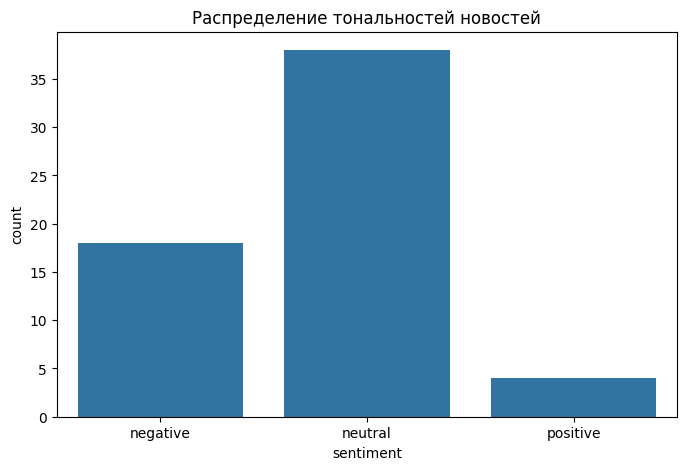

In [362]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df)
plt.title("Распределение тональностей новостей")
plt.show()

In [363]:
X = embeddings[:-1]
y = df['sentiment'][:-1]
X_test = [embeddings[-1]]
y_test = [df['sentiment'].iloc[-1]]

In [364]:

clf = RandomForestClassifier()
clf.fit(X, y)
pred = clf.predict(X_test)

In [365]:
pred[:10], y_test[:10]

(array(['neutral'], dtype=object), ['neutral'])

In [366]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment_encoded'] = label_encoder.fit_transform(df['sentiment'])

In [367]:
df = df.reset_index(drop=True)

In [368]:
ln = 20

X = []
y = []

embeddings = np.vstack(df['embedding'].values)
labels = df['sentiment_encoded'].values

In [369]:
for i in range(len(df) - ln):
    X.append(embeddings[i:i+ln])
    y.append(labels[i+ln])

X = np.array(X)
y = np.array(y)

In [370]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [371]:
model = Sequential([
    Masking(mask_value=0., input_shape=(SEQ_LEN, embeddings.shape[1])),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [372]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [373]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.1)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 805ms/step - accuracy: 0.4554 - loss: 1.0779 - val_accuracy: 0.7500 - val_loss: 1.0101
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.6815 - loss: 0.9686 - val_accuracy: 0.7500 - val_loss: 0.8863
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6369 - loss: 0.8918 - val_accuracy: 0.7500 - val_loss: 0.7624
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6161 - loss: 0.8247 - val_accuracy: 0.7500 - val_loss: 0.6855
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6369 - loss: 0.7569 - val_accuracy: 0.7500 - val_loss: 0.6573
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6577 - loss: 0.8294 - val_accuracy: 0.7500 - val_loss: 0.6573
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.6577 - loss: 0.6849 - val_accuracy: 0.7500 - val_loss: 0.6642
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7500 - loss: 0.6672 - val_accuracy: 0.7500 - val_loss: 0.6

In [374]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6250 - loss: 0.9316
Test accuracy: 0.62


In [375]:
import random
idx = random.randint(0, len(X_test)-1)
pred = model.predict(X_test[idx:idx+1])
pred_label = label_encoder.inverse_transform([np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


In [376]:
print("Ист", label_encoder.inverse_transform([y_test[idx]])[0])
print("Пред", pred_label[0])

Ист positive
Пред neutral


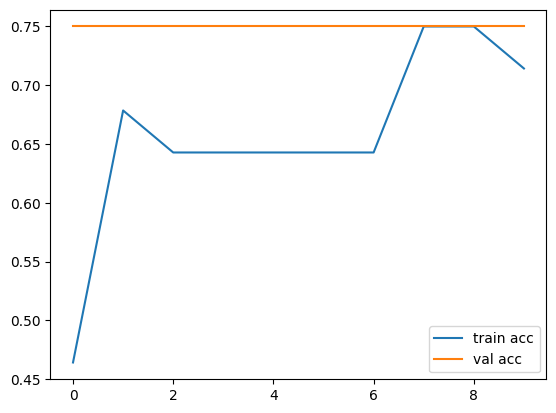

In [377]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [378]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [379]:
df['sentiment_binary'] = df['sentiment'].apply(lambda x: 0 if x == 'neutral' else 1)

num_clusters = 6
embeddings = np.vstack(df['embedding'].values)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['topic_cluster'] = kmeans.fit_predict(embeddings)

encoder = OneHotEncoder(sparse_output=False)
topic_ohe = encoder.fit_transform(df[['topic_cluster']])

for i in range(num_clusters):
    df[f'topic_{i}'] = topic_ohe[:, i]

In [380]:
ln= 4

X_emb = []
X_topics = []
X_sentiments = []
y = []

for i in range(len(df) - SEQ_LEN):
    X_emb.append(embeddings[i:i+SEQ_LEN])
    X_topics.append(topic_ohe[i:i+SEQ_LEN])
    X_sentiments.append(df['sentiment_binary'].values[i:i+SEQ_LEN])
    y.append(df['sentiment_binary'].values[i+SEQ_LEN])

X_emb = np.array(X_emb)
X_topics = np.array(X_topics)
X_sentiments = np.array(X_sentiments)
y = np.array(y)


In [381]:
X = np.concatenate([X_emb, X_topics, X_sentiments[..., None]], axis=2)

In [382]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [383]:
model1 = Sequential([
    Masking(mask_value=0., input_shape=(SEQ_LEN, X.shape[2])),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [384]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC', 'accuracy'])

In [385]:
history = model1.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - AUC: 0.4913 - accuracy: 0.5583 - loss: 0.6896 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5692
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - AUC: 0.7511 - accuracy: 0.5917 - loss: 0.6602 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5258
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - AUC: 0.7768 - accuracy: 0.6202 - loss: 0.6329 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5164
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - AUC: 0.7932 - accuracy: 0.7105 - loss: 0.6156 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.5158
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - AUC: 0.8951 - accuracy: 0.7780 - loss: 0.5805 - val_AUC: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.5055
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - AUC: 0.8867 - accuracy: 0.7440 - loss: 0.5822 - val_AUC: 0.0000e+00 - val_accuracy: 0.8000 - val_loss: 0.4980
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━

In [386]:
loss, auc, acc = model1.evaluate(X_test, y_test)
print(f"Test AUC: {auc:.3f}, Accuracy: {acc:.3f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - AUC: 0.6250 - accuracy: 0.5833 - loss: 0.6565
Test AUC: 0.625, Accuracy: 0.583


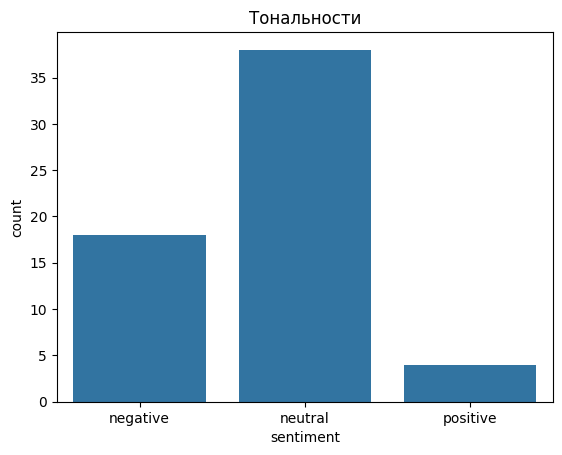

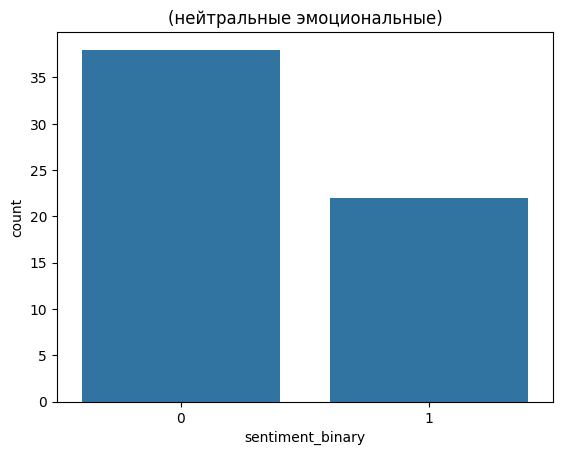

In [387]:
sns.countplot(x=df['sentiment'])
plt.title('Тональности')
plt.show()

sns.countplot(x=df['sentiment_binary'])
plt.title('(нейтральные эмоциональные)')
plt.show()

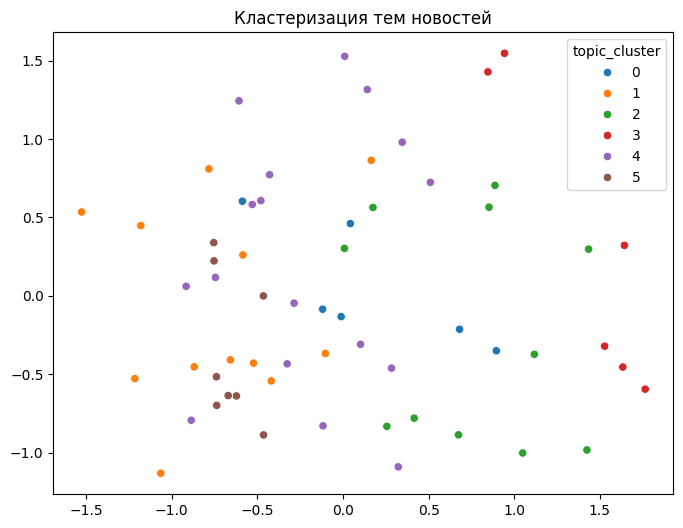

In [388]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_emb = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_emb[:,0], y=reduced_emb[:,1], hue=df['topic_cluster'], palette='tab10')
plt.title('Кластеризация тем новостей')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


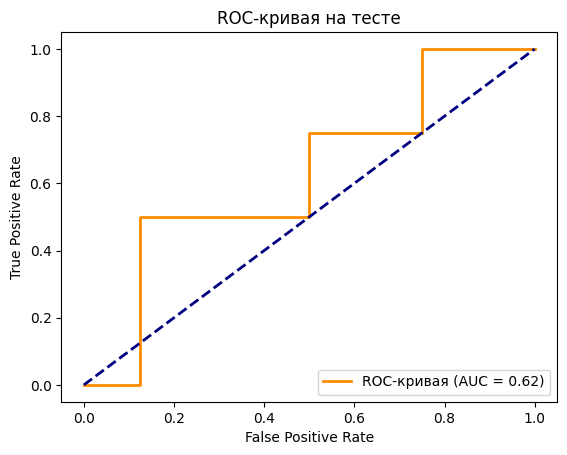

In [391]:
from sklearn.metrics import roc_curve, auc

y_pred = model1.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая на тесте')
plt.legend(loc="lower right")
plt.show()


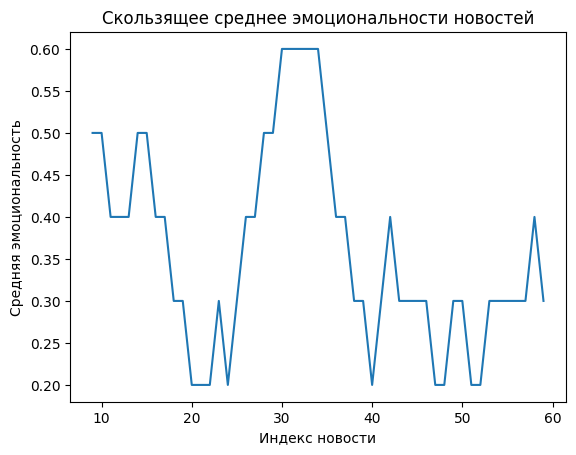

In [390]:
plt.plot(df['sentiment_binary'].rolling(10).mean())
plt.title('Скользящее среднее эмоциональности новостей')
plt.xlabel('Индекс новости')
plt.ylabel('Средняя эмоциональность')
plt.show()
